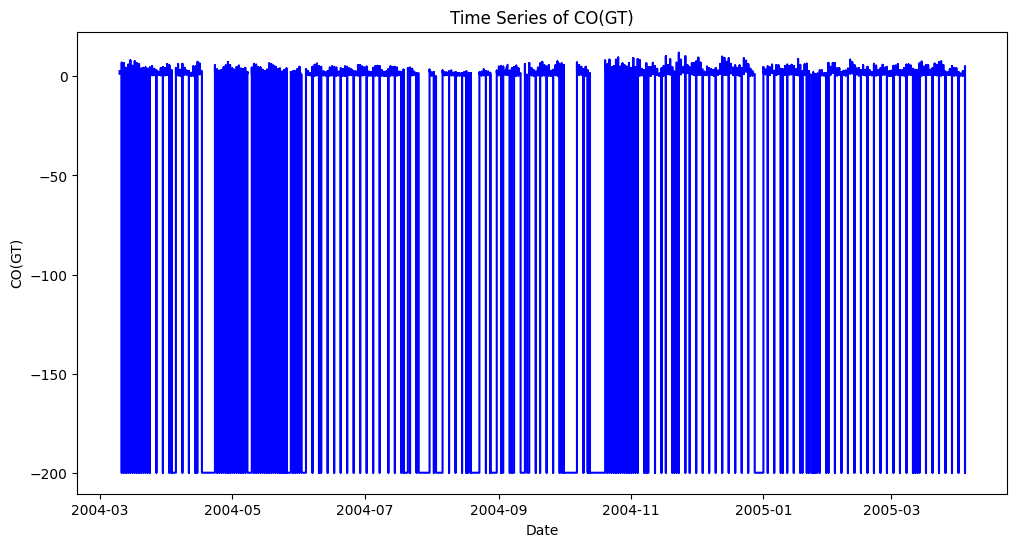

C:\Users\bo.chen18\AppData\Local\Temp\ipykernel_18532\2473691242.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_cleaned.fillna(method='ffill').fillna(method='bfill')


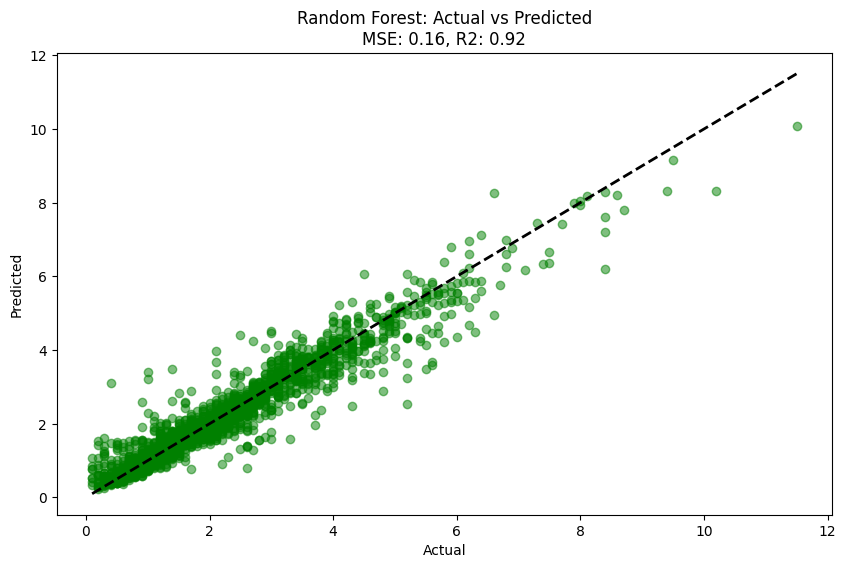

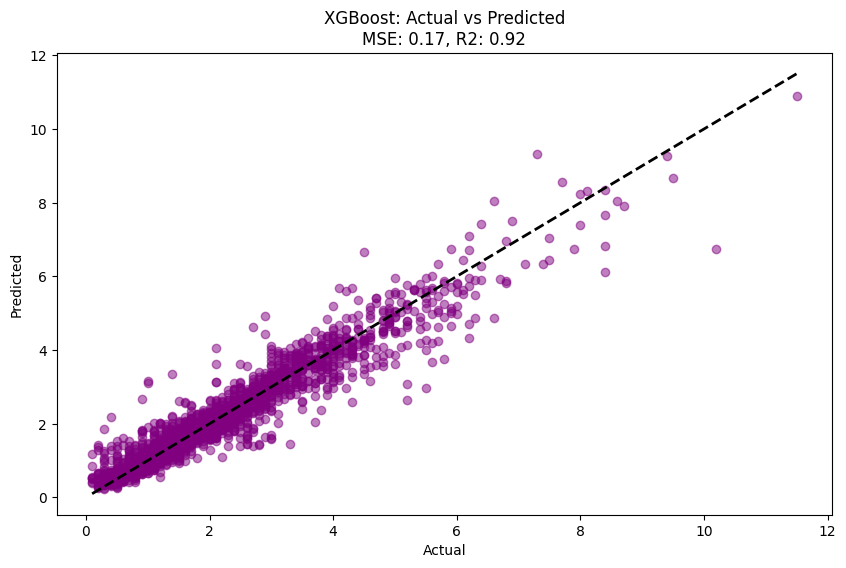

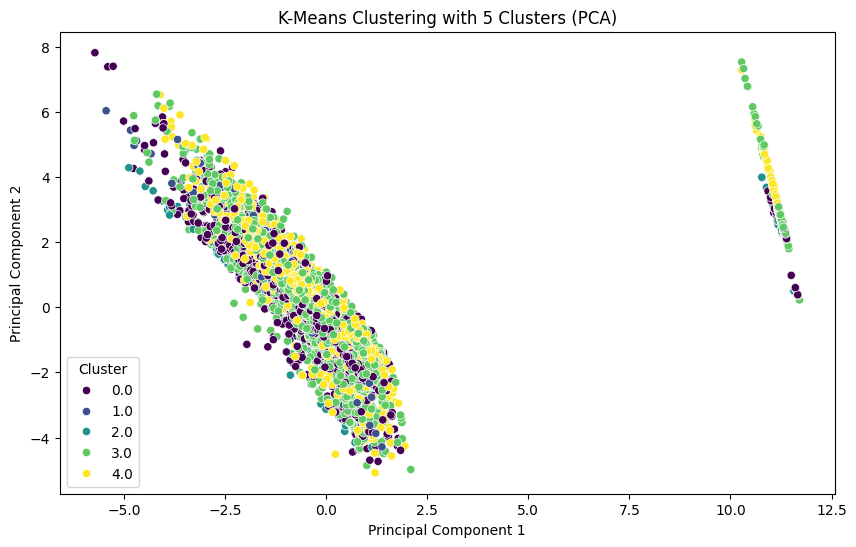

In [5]:
# 重新读取数据并处理
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
file_path = r'D:\Pythonworkshop\Dataset\AirQualityUCI.xlsx'
df = pd.read_excel(file_path)

# 首先，我们可视化目标序列（CO(GT)）的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['CO(GT)'], color='blue')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.title('Time Series of CO(GT)')
plt.show()

# 删除数据中的时间列
df_dropped = df.drop(columns=['Date', 'Time'])
df_dropped.head()


# 删除目标列（CO(GT)）中值为-200的数据行
df_cleaned = df_dropped[df_dropped['CO(GT)'] != -200]

# 检查清理后的数据集
df_cleaned.describe()

# 数据清洗与处理
df_filled = df_cleaned.fillna(method='ffill').fillna(method='bfill')
df_filled = df_filled.select_dtypes(include=[np.number])


# 1. 监督学习示例：线性回归

# 准备数据，将目标变量 'CO(GT)' 和其他特征分开
X_supervised = df_filled.drop(columns=['CO(GT)'])
y_supervised = df_filled['CO(GT)']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# 1. 监督学习示例：随机森林（RF）和XGBoost

# 初始化随机森林模型并训练
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 预测测试集
y_pred_rf = rf_model.predict(X_test)

# 计算随机森林模型的性能
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 初始化XGBoost模型并训练
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# 预测测试集
y_pred_xgb = xgb_model.predict(X_test)

# 计算XGBoost模型的性能
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 可视化随机森林的预测值与实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Random Forest: Actual vs Predicted\nMSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')
plt.show()

# 可视化XGBoost的预测值与实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'XGBoost: Actual vs Predicted\nMSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f}')
plt.show()

# 2. 非监督学习示例：K-Means聚类（保留原K-Means的可视化结果）

# 已经展示的K-Means可视化结果不需要重新生成。如果有需要进一步的操作，请告诉我。


# 2. 非监督学习示例：K-Means聚类

# 标准化数据
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filled)

# 初始化K-Means并拟合数据
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# 添加聚类结果到数据集
df_filled['Cluster'] = kmeans.labels_

# 使用PCA降维并可视化新的聚类结果
pca_kmeans = PCA(n_components=2)
pca_components = pca_kmeans.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df_filled['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering with 5 Clusters (PCA)')
plt.show()
